In [1]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

C:\Users\bharg\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
import matplotlib.pyplot as plt
# List of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}


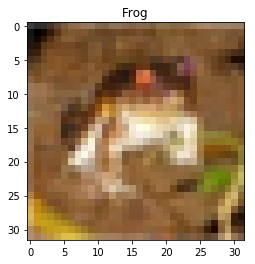

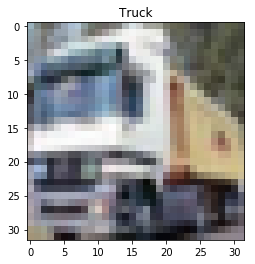

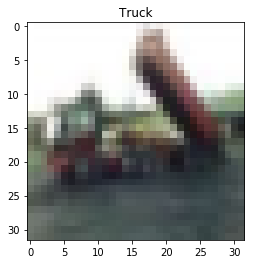

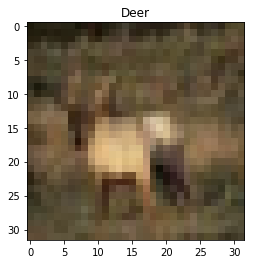

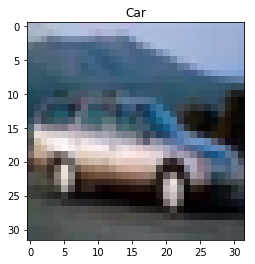

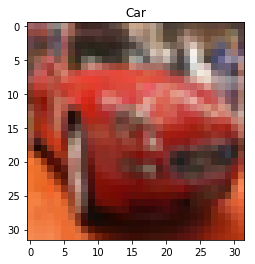

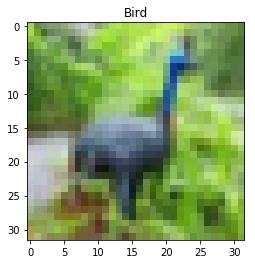

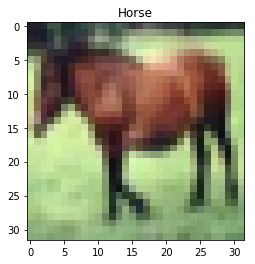

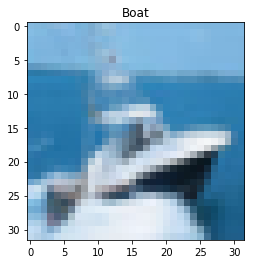

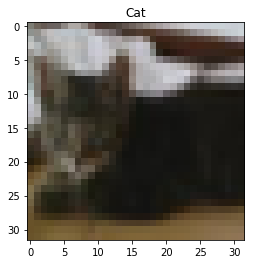

In [5]:
# Loop through each picture in the data set
for i in range(10):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class id
    image_class_number = y_train[i][0]
    # Look up the class name from the class id
    image_class_name = cifar10_class_names[image_class_number]

    # Draw the image as a plot
    plt.imshow(sample_image)
    # Label the image
    plt.title(image_class_name)
    # Show the plot on the screen
    plt.show()

In [6]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu", kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation="relu", kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [8]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 55s 1ms/step - loss: 1.9861 - acc: 0.2587 - val_loss: 1.6946 - val_acc: 0.3848
Epoch 2/100
50000/50000 [==============================] - 37s 738us/step - loss: 1.6723 - acc: 0.3818 - val_loss: 1.5348 - val_acc: 0.4396
Epoch 3/100
50000/50000 [==============================] - 36s 725us/step - loss: 1.5213 - acc: 0.4424 - val_loss: 1.3842 - val_acc: 0.4967
Epoch 4/100
50000/50000 [==============================] - 37s 731us/step - loss: 1.4190 - acc: 0.4844 - val_loss: 1.3106 - val_acc: 0.5273
Epoch 5/100
50000/50000 [==============================] - 36s 726us/step - loss: 1.3416 - acc: 0.5144 - val_loss: 1.2255 - val_acc: 0.5678
Epoch 6/100
50000/50000 [==============================] - 36s 727us/step - loss: 1.2670 - acc: 0.5437 - val_loss: 1.1519 - val_acc: 0.5901
Epoch 7/100
50000/50000 [==============================] - 36s 728us/step - loss: 1.2062 - acc: 0.5661 - val_los

Epoch 59/100
50000/50000 [==============================] - 39s 778us/step - loss: 0.4148 - acc: 0.8526 - val_loss: 0.5565 - val_acc: 0.8165
Epoch 60/100
50000/50000 [==============================] - 40s 810us/step - loss: 0.4120 - acc: 0.8515 - val_loss: 0.5518 - val_acc: 0.8153
Epoch 61/100
50000/50000 [==============================] - 38s 766us/step - loss: 0.4025 - acc: 0.8575 - val_loss: 0.5595 - val_acc: 0.8166
Epoch 62/100
50000/50000 [==============================] - 39s 771us/step - loss: 0.3960 - acc: 0.8599 - val_loss: 0.5683 - val_acc: 0.8137
Epoch 63/100
50000/50000 [==============================] - 39s 771us/step - loss: 0.3982 - acc: 0.8584 - val_loss: 0.5589 - val_acc: 0.8169
Epoch 64/100
50000/50000 [==============================] - 39s 771us/step - loss: 0.3877 - acc: 0.8616 - val_loss: 0.5879 - val_acc: 0.8103
Epoch 65/100
50000/50000 [==============================] - 39s 771us/step - loss: 0.3860 - acc: 0.8616 - val_loss: 0.5629 - val_acc: 0.8177
Epoch 66/100


In [10]:
model.save('Final_Cnn_model_1.h5')

# CNN With Image Augmentation

In [47]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [48]:
import matplotlib.pyplot as plt
# List of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

In [49]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
datagen.fit(x_train)

In [50]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
input_shape = (32, 32, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [51]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [52]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))



In [53]:
opt = Adam(lr=0.001)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
Augm_model = model2.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
391/390 [==============================] - 35s 90ms/step - loss: 1.9652 - acc: 0.3637 - val_loss: 1.4579 - val_acc: 0.4752
Epoch 2/100
391/390 [==============================] - 33s 85ms/step - loss: 1.4428 - acc: 0.4905 - val_loss: 1.5329 - val_acc: 0.4735
Epoch 3/100
391/390 [==============================] - 32s 83ms/step - loss: 1.2183 - acc: 0.5687 - val_loss: 1.3150 - val_acc: 0.5617
Epoch 4/100
391/390 [==============================] - 34s 87ms/step - loss: 1.0939 - acc: 0.6150 - val_loss: 0.9316 - val_acc: 0.6779
Epoch 5/100
391/390 [==============================] - 32s 81ms/step - loss: 0.9872 - acc: 0.6503 - val_loss: 1.3166 - val_acc: 0.5898
Epoch 6/100
391/390 [==============================] - 34s 88ms/step - loss: 0.9401 - acc: 0.6707 - val_loss: 0.9067 - val_acc: 0.6877
Epoch 7/100
391/390 [==============================] - 31s 80ms/step - loss: 0.8837 - acc: 0.6904 - val_loss: 1.0596 - val_acc: 0.6492
Epoch 8/100
391/390 [==============================] - 

391/390 [==============================] - 32s 83ms/step - loss: 0.3933 - acc: 0.8619 - val_loss: 0.4287 - val_acc: 0.8605
Epoch 62/100
391/390 [==============================] - 33s 86ms/step - loss: 0.3986 - acc: 0.8624 - val_loss: 0.4906 - val_acc: 0.8394
Epoch 63/100
391/390 [==============================] - 32s 83ms/step - loss: 0.4009 - acc: 0.8600 - val_loss: 0.4557 - val_acc: 0.8492
Epoch 64/100
391/390 [==============================] - 33s 85ms/step - loss: 0.3934 - acc: 0.8638 - val_loss: 0.4508 - val_acc: 0.8537
Epoch 65/100
391/390 [==============================] - 32s 82ms/step - loss: 0.3916 - acc: 0.8645 - val_loss: 0.4306 - val_acc: 0.8565
Epoch 66/100
391/390 [==============================] - 33s 84ms/step - loss: 0.3888 - acc: 0.8628 - val_loss: 0.4124 - val_acc: 0.8628
Epoch 67/100
391/390 [==============================] - 32s 82ms/step - loss: 0.3759 - acc: 0.8680 - val_loss: 0.4545 - val_acc: 0.8524
Epoch 68/100
391/390 [==============================] - 33s 8

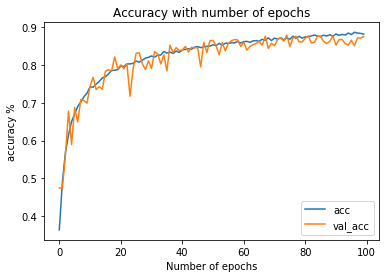

In [58]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(Augm_model.history['acc'])
pllt.plot(Augm_model.history['val_acc'])
pllt.title('Accuracy with number of epochs')
pllt.ylabel('accuracy %')
pllt.xlabel('Number of epochs')
pllt.legend(['acc', 'val_acc'])
pllt.show()

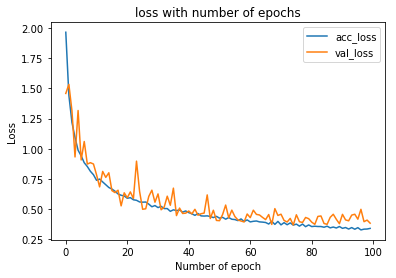

In [60]:
pllt.plot(Augm_model.history['loss'])
pllt.plot(Augm_model.history['val_loss'])
pllt.title('loss with number of epochs')
pllt.ylabel('Loss')
pllt.xlabel('Number of epoch')
pllt.legend(['acc_loss', 'val_loss'])
pllt.show()

In [31]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

# These are the CIFAR10 class labels from the training data (in order from 0 to 9)
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [34]:
img = image.load_img("deer.png", target_size=(32, 32))
image_to_test = image.img_to_array(img)
img1 = np.expand_dims(image_to_test, axis=0)
img1 = img1.astype('float32')
img1 = img1 / 255.0
result = model2.predict_classes(img1)
print(result)

[4]


In [35]:
prediction=int(result)
class_label = class_labels[prediction]

# Print the result
print("The image given is a {} ".format(class_label))

The image given is a Deer 
